## Libraries
The following cell imports all important libraries for a standard SESANS analysis

In [1]:
import sesansPandas as s
# from sesansPandas import SesansReductionC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math

## Path
Every user can specify the path to the measurements and to where they want to store their analysis

In [2]:
pathread="C:/Users/wbouwman/Documents/Mydata/sesans/metingen" #Path to the original sample file
# pathread="M:/tnw/rrrrid/rid/F&S/Sesans" #Path to the original sample file
pathwrite="C:/Users/wbouwman/Documents/Mydata/sesans/metingen/analysed" #Path to write reduced data
# pathread="D:/SESANSpxi/Data" #Path to the original sample file
# pathwrite="D:/SESANSpxi/Data/analysed" #Path to write reduced data
paths=[pathread,pathwrite]

## Normal user 
This is an example how a user could reduce their data

interactive(children=(IntSlider(value=374, description='i', max=749), Output()), _dom_classes=('widget-interac…

   position              name  thickness[cm]  empty          shim  \
0     263.0        empty beam            0.0   True  14583.599259   
1     213.0  Nylon Filter 10l            1.0  False  11230.781006   
2     163.0  Nylon filter 25l            2.5  False   7619.130619   

   transmission  
0      1.000000  
1      0.770097  
2      0.522445  


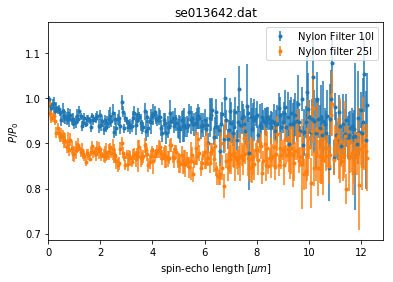

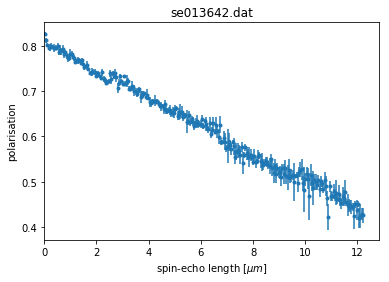

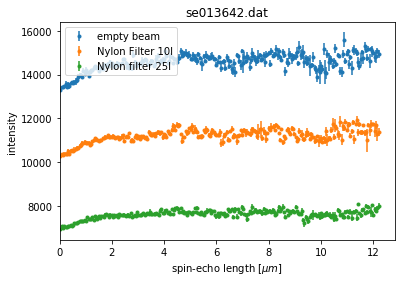

In [3]:
self=s.SesansReductionC.Analyse(13642,paths)
# s.ExcelWrite(self,paths) # complete dump of all analysis
# s.SesWrite(self,paths) # export into format for SasView and SasFit
s.NormPlot(self)
s.EmptyPlot(self)
s.ShimPlot(self)
print(self.samples)

# test field 

In [4]:
print(self.pars.loc["Nrsubsetpoints"])
int(self.pars.loc["filenumber"].values[0])
# print(self)

# self=s.SesansReductionC(13358,paths)
# s.ExcelWrite(self,paths)
# s.SesWrite(self,paths)
# self.normalised[1].plot(x='spin-echo length [um]', y='P/P0', style='o');
# plt.figure()
# for i in range(len(self.samples.index)):
#     if not self.samples.loc[i,"empty"]:
#         plt.errorbar(self.normalised[i]["spin-echo length [um]"].values[:],
#         self.normalised[i]["P/P0"].values[:],
#         fmt='.',
#         label=self.samples.loc[i,"name"][0],
#         yerr=self.normalised[i]["P/P0 error"].values[:])
# plt.xlabel('Spin-echo length [$\mu m$]')
# plt.ylabel('$P/P_0$')   
# plt.legend()
# plt.xlim(left=0)
# #        ylow = np.amax([0, np.amin(pn-en)])
# #        plt.ylim(ylow,1.1)     
# plt.title(self.pars.loc['Title'].values[0])

0    7
Name: Nrsubsetpoints, dtype: object


13627

## Instrument expert use
Example to directly choose which routines to run to get full access to intermediate results.

In [6]:
self=s.SesansReductionC.FileRead(13627,paths)
# SesansReductionC.DropRubbish(self)          # instrument expert prefer to have all data
s.SesansReductionC.FindNumberSinePoints(self)        
s.SesansReductionC.SelectGoodRaw(self)
s.SesansReductionC.Date2TimeStruc(self)
s.SesansReductionC.AddSpinEchoLength(self)
s.SesansReductionC.CalcYE(self)
s.SesansReductionC.MeanSines(self)
s.SesansReductionC.getpol(self,fitplot=True)
s.SesansReductionC.FindSamples(self)
# SesansReductionC.GetEmpty(self)             # for polarisation determination not working
# SesansReductionC.Normalise(self)            # for polarisation determination not working


interactive(children=(IntSlider(value=124, description='i', max=249), Output()), _dom_classes=('widget-interac…

## Custom plot
Example on how to access yourself the direct data to create publication quality graphs 

In [ ]:
# for samnr in range(len(ana.stit)):
#     plt.errorbar(ana.z,ana.pn[samnr,:],yerr=ana.en[samnr,:],fmt='.',label=ana.stit[samnr])

# # plt.errorbar(ana.z,ana.p0,yerr=ana.e0,fmt='.',label="Empty")    
# plt.xlabel('Spin-echo length [$\mu m$]')
# plt.ylabel('$P/P_0$')   
# plt.legend()
# plt.xlim(left=0)
# plt.ylim(0.15, 1.1)
